**Σπυρίδωνος Βασίλειος  


**Παρουσίαση κώδικα και αποτελέσματα:**  
Για να παρουσιάσω τον κώδικά μου στο jupyter notebook, τον έχω τροποποιήσει ώστε να μπορεί να τρέξει χωρίς εντολές από τη γραμμή εντολών. Αρχικά, τρέχουμε το πρώτο cell που περιλαμβάνει τον κώδικα. Μετά, τρέχοντας κάθε ένα από τα παρακάτω cells παίρνουμε και μία διαφορετική εικόνα σαν αποτέλεσμα, διότι δίνουμε κάθε φορά διαφορετικές τιμές ως παραμέτρους. Οι αφινικοί μετασχηματισμοί που υλοποίησα είναι στροφή, κλιμάκωση και στρέβλωση κατά χ.

In [1]:
# Spyridonos Vasileios
# AM : 2820

import sys
import numpy as np
import matplotlib.pyplot as plt
from numpy import *
from PIL import Image


def affine_transformation(input_filename, output_filename, a1, a2, a3, a4, a5, a6):

    # Pairnw tin arxiki eikona kai tin apothikeuw ws pinaka sto starting_image
    starting_image = np.array(Image.open(input_filename))


    # Pairnw to onoma tou output file pou einai to deutero orisma
    # kai to apothikeuw sto output_file
    output_file = output_filename

    # Apothikeuw tis grammes kai tis stiles tis arxikis eikonas sta rows, columns antistoixa
    rows = starting_image.shape[0]
    columns = starting_image.shape[1]

    # Ftiaxnw tin eikona apo ton pinaka starting_image
    plt.imshow(starting_image, cmap = "gray")

    # Dimiourgw tis first_row kai second_row pou anaparistoun tin prwti kai deuteri grammi
    # antistoixa tou pinaka metasximatismou
    # Sti first_row vazw tis a1, a2, a3
    first_row = [a1, a2, a3]
    # Sti second_row vazw tis a4, a5, a6
    second_row = [a4, a5, a6]

    
    # Estw transformed_image o pinakas tis eikonas pou tha prokypsei apo ton affiniko metasximatismo,
    # arxikopoihmenos me midenika
    transformed_image = np.zeros([rows, columns])


    for r in range(rows):
        for c in range(columns):
            # Estw (x,y) i thesi tou simeiou arxika
            # Ta rows/2 kai columns/2 yparxoun gia na ginei o metasximatismos ws pros to eikonostoixeio
            # pou vrisketai sto meso tis eikonas
            x = r - rows / 2
            y = c - columns / 2

            # Efarmozw metasximatismo kai paremvoli kontinoterou geitona gia to x
            # To rows/2 yparxei gia na ginei o metasximatismos ws pros to eikonostoixeio
            # pou vrisketai sto meso tis eikonas
            transf_x = first_row[0] * x + first_row[1] * y + first_row[2] * 1 + rows / 2
            # interp_x tha einai i syntetagmeni x tou simeiou meta to metasximatismo
            interp_x = round(transf_x)

            # Efarmozw metasximatismo kai paremvoli kontinoterou geitona gia to y
            # To columns/2 yparxei gia na ginei o metasximatismos ws pros to eikonostoixeio
            # pou vrisketai sto meso tis eikonas
            transf_y = second_row[0] * x + second_row[1] * y + second_row[2] * 1 + columns / 2
            # interp_y tha einai i syntetagmeni y tou simeiou meta to metasximatismo
            interp_y = round(transf_y)


            # Pairnw tin timi apo tin thesi tou simeiou kai ti vazw sti thesi [r][c]
            if(interp_x >= 0 and interp_y >= 0 and interp_x < rows and interp_y < columns):
                transformed_image[r][c] = starting_image[interp_x][interp_y]

    # Ftiaxnw tin eikona apo ton pinaka transformed_image
    plt.imshow(transformed_image, cmap = "gray")
    # Emfanizw tin eikona
    plt.show()
    # Apothikeuw tin eikona
    save_image = Image.fromarray(transformed_image.astype(np.uint8))
    save_image.save(output_file)


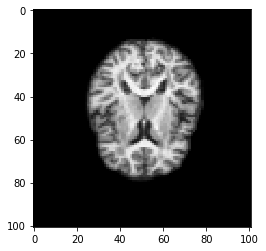

In [2]:
# Περιστροφή κατά 90 μοίρες γύρω από την αρχή των αξόνων.
affine_transformation('brain0030slice150_101x101.png', 'output_1.png', 0, -1, 0, 1, 0, 0)

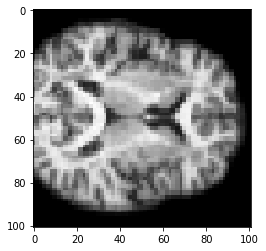

In [3]:
# Κλιμάκωση
affine_transformation('brain0030slice150_101x101.png', 'output_3.png', 0.60, 0, 0, 0, 0.60, 0)

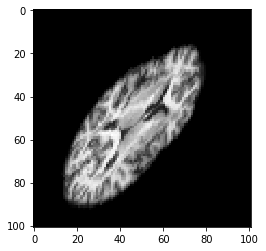

In [4]:
# Στρέβλωση κατά χ
affine_transformation('brain0030slice150_101x101.png', 'output_3.png', 1, 0.8, 0, 0, 1, 0)